# Lista de Exercícios 4 (soluções propostas)
*Alguns exercícios foram retirados do livro: [The Python Workbook - Ben Stephenson](https://link.springer.com/book/10.1007/978-3-319-14240-1).

Não é um gabarito fechado. As soluções encontradas aqui são apenas algumas possibilidades. Usem a criatividade!

In [1]:
import random as rd

## QUESTÃO 1:

Crie uma função que inverta um dicionário. A função deve receber como parâmetro de entrada um dicionário e retornar um novo dicionário em que as chaves são valores do dicionário de entrada e os valores são listas de chaves do dicionário de entrada. Por exemplo:

```python
dic_entrada={"chave1" : "valor1", "chave2" : "valor2", "chave3" : "valor1"}

dic_saida={"valor1" : ["chave1", "chave3"], "valor2" : ["chave2"]}
```

In [2]:
def inverteDic(dic):
    novo_dic={}
    itens=dic.items()
    for item in list(itens):
        k=item[0]
        v=item[1]
        if v in novo_dic:
            novo_dic[v].append(k)
        else:
            novo_dic[v]=[k]
    return novo_dic

In [3]:
dic_entrada={"chave1" : "valor1", "chave2" : "valor2", "chave3" : "valor1"}

In [4]:
inverteDic(dic_entrada)

{'valor1': ['chave1', 'chave3'], 'valor2': ['chave2']}

## QUESTÃO 2:

Crie uma função que simule o lançamento de dois dados (de seis lados) $N$ vezes. Conforme seu programa é executado, ele deve contar o número de vezes que ocorre cada total, ou seja, a cada lançamento você deve armazenar a soma dos resultados de ambas as faces obtidas e ir contando quantas vezes esses valores se repetem até o final da simulacão. Sua função deverá retornar um dicionário com a frequência de cada resultado e a porcentagem esperada pela teoria da probabilidade para cada total. Ou seja, um dicionário em que as chaves são os resultados e o valores são listas de dois elementos, em que o primeiro elemento é a frequência (em porcentagem) e o segundo, o valor esperado (em porcentagem). 

Teste para $N=1000$.

In [5]:
def lancaDados():
    d1=rd.randint(1,6)
    d2=rd.randint(1,6)
    return d1+d2

In [6]:
def simulaDados(n): 
    dic={i: [0,0] for i in range(2,13)} #Todos os resultados possíveis!
    for i in range(1,7):
        for j in range(1,7):
            dic[i+j][1]=dic[i+j][1]+(1/6)*(1/6)
            
    for i in range(n):
        result=lancaDados()
        dic[result][0]=dic[result][0]+1
    
    #Transformando os valores em porcentagens!
    for k in dic:
        dic[k][0]=round((dic[k][0]/n)*100,2)
        dic[k][1]=round(dic[k][1]*100,2)
        
        
    return dic

In [7]:
simulaDados(1000)

{2: [1.7, 2.78],
 3: [4.8, 5.56],
 4: [8.8, 8.33],
 5: [10.8, 11.11],
 6: [15.0, 13.89],
 7: [16.1, 16.67],
 8: [14.9, 13.89],
 9: [11.9, 11.11],
 10: [8.2, 8.33],
 11: [5.8, 5.56],
 12: [2.0, 2.78]}

## QUESTÃO 3:

Provavelmente você não utlizou um celular básico. Na época em que as mensagens de texto eram enviadas usando o próprio teclado numérico. Vamos fingir que não faz tanto tempo assim, está bem? Até porque eles ainda são comercializados. 

Em telefones assim, cada tecla possui várias letras associadas a ela, vários toques de tecla são necessários para a maioria das letras. Pressionar o número uma vez gera a primeira letra da tecla. Pressionar o número 2 ou 3 vezes gera a segunda ou terceira letra da tecla. 

Sua tarefa é criar uma função que recebe como parâmetro de entrada uma mensagem (o dicionário para a conversão também pode ser uma entrada) e retorne a sequência de cliques em cada tecla caso a mensagem fosse escrita em um celular básico.

Para isso, você deve contruir um dicionário que mapeie de cada letra ou símbolo para as teclas pressionadas. 

| CHAVE 	|  SÍMBOLO  	|
|:-----:	|:---------:	|
|   1   	| . , ? ! : 	|
|   2   	|   A B C   	|
|   3   	|   D E F   	|
|   4   	|   G H I   	|
|   5   	|   J K L   	|
|   6   	|   M N O   	|
|   7   	|  P Q R S  	|
|   8   	|   T U V   	|
|   9   	|  W X Y Z  	|
|   0   	|   espaço  	|


Por exemplo, se você passar como entrada "Hello, World!" então, seu programa deve retornar 4433555555666110966677755531111. 


**OBS**: Certifique-se de que seu programa lida com letras maiúsculas e minúsculas. Ignore quaisquer caracteres que não estejam listados na tabela acima (também não estamos levando em consideração a acentuação das letras). 

In [8]:
telefone={1: ['.',',','?','!',':'],
          2: ['A','B','C'],
          3: ['D','E','F'],
          4: ['G','H','I'],
          5: ['J','K','L'],
          6: ['M','N','O'],
          7: ['P','Q','R','S'],
          8: ['T','U','V'],
          9: ['W','X','Y','Z'],
          0: [' ']}

In [9]:
def sublistaItem(lista, item):
    for ind in range(len(lista)):
        if item in lista[ind][1]:
            return [ind,lista[ind][1].index(item)] #retorna a posição i,j do item na lista

In [10]:
list(telefone.items())

[(1, ['.', ',', '?', '!', ':']),
 (2, ['A', 'B', 'C']),
 (3, ['D', 'E', 'F']),
 (4, ['G', 'H', 'I']),
 (5, ['J', 'K', 'L']),
 (6, ['M', 'N', 'O']),
 (7, ['P', 'Q', 'R', 'S']),
 (8, ['T', 'U', 'V']),
 (9, ['W', 'X', 'Y', 'Z']),
 (0, [' '])]

In [11]:
sublistaItem(list(telefone.items()),'H')

[3, 1]

In [12]:
def converteMensagem(texto,dic):
    texto=texto.upper()
    mensagem=''
    itens=list(dic.items()) #uma lista de (listas de 2 elementos) (ou tuplas) 

    for letra in texto:
        k,ind=sublistaItem(itens,letra) #Função auxiliar!
        #k na lista de itens é o índice da chave na lista e não a própria chave
        #ind é a posição do item na lista, ou seja a quantidade de vezes (-1) que terá que pressionar a tecla k
        for i in range(ind+1): #compensamos com ind+1, pois a indexação no Python começa do zero!
            mensagem=mensagem+str(k+1)
    return mensagem

In [13]:
converteMensagem('Hello, World!',telefone)

'44335555556661110966677755531111'

## QUESTÃO 4:

O arquivo ``dados_eleicao.txt`` contém os dados de uma eleição, com as informações sobre número do eleitor (**NumEleitor**), bairro (**Bairro**) e código do candidato (**CodCandidato**). 

Sua tarefa é criar uma função que leia esse arquivo e:

* calcule o total de votos e a porcentagem do total por **CodCandidato**;

* calcule o total de votos e a porcentagem do total por **Bairro**;

* calcule o total de votos e a porcentagem do total por **CodCandidato+Bairro**. 

Armazene esses resultados em três dicionários distintos para serem a saída da sua função.

**DICA**: É interessante trabalhar com a ideia de criar funções auxiliares, quando uma determinada rotina se repete ao longo da função principal.

In [14]:
def porcentagem(dic):
    tot=sum(dic.values())
    for k in dic:
        dic[k]=[dic[k], str(round(dic[k]/tot*100,2))+'%']
    return dic

In [15]:
def eleicao(arquivo):
    f=open(arquivo, 'r')
    
    head=f.readline().split('\n')[0].split('\t')
    candidatos={}
    bairros={}
    cand_bairros={}
    
    for linha in f:
        res=linha.split('\n')[0].split('\xa0')[0].split('\t')
        b=res[1]
        c=res[2]
        if b in bairros:
            bairros[b]=bairros[b]+1
        else:
            bairros[b]=1
            
        if c in candidatos:
            candidatos[c]=candidatos[c]+1
        else:
            candidatos[c]=1
            
        if c in cand_bairros:
            if b in cand_bairros[c]:
                cand_bairros[c][b]=cand_bairros[c][b]+1
            else:
                cand_bairros[c][b]=1
        else:
            cand_bairros[c]={}
    
    f.close()
    
    for cb in cand_bairros:
        cand_bairros[cb]=porcentagem(cand_bairros[cb])
        
    return porcentagem(candidatos), porcentagem(bairros), cand_bairros

In [16]:
candidatos,bairros,cand_bairros=eleicao('dados_eleicao.txt')

In [17]:
sorted(candidatos.items())

[('Adriano Pirulito', [95, '6.33%']),
 ('Advogado de Deus', [48, '3.2%']),
 ('Agenor Passa Régua', [57, '3.8%']),
 ('Alessandro Fuscão', [85, '5.67%']),
 ('Capitã Cloroquina', [45, '3.0%']),
 ('Donizete Gato Preto', [65, '4.33%']),
 ('Dudu Cremoso', [93, '6.2%']),
 ('Enia da Toca da Onça', [91, '6.07%']),
 ('Ferreira do Suvacão', [101, '6.73%']),
 ('Gordinho da Usina', [61, '4.07%']),
 ('Herminho Anão da VGC', [27, '1.8%']),
 ('Itamar Boi', [59, '3.93%']),
 ('Madurão', [74, '4.93%']),
 ('Pipi de Jorge', [45, '3.0%']),
 ('Professor Goiaba', [72, '4.8%']),
 ('Pé de Pato do Lixo', [39, '2.6%']),
 ('Quinzinho da Água Parada', [78, '5.2%']),
 ('Ricardo Fucinho', [44, '2.93%']),
 ('Sallim Solução Amor no Coração', [75, '5.0%']),
 ('Tadeu Tô Contigo', [61, '4.07%']),
 ('Valéria Minha Prima', [65, '4.33%']),
 ('Zé Perninha', [42, '2.8%']),
 ('Ângela do Zé Rolinha', [78, '5.2%'])]

In [18]:
sorted(bairros.items())

[('Central', [76, '5.07%']),
 ('Grande Méier', [225, '15.0%']),
 ('Grande Tijuca', [73, '4.87%']),
 ('Ilha e Leopoldina', [67, '4.47%']),
 ('Norte', [293, '19.53%']),
 ('Oeste: Barra e JPA', [201, '13.4%']),
 ('Oeste: Grande Bangu', [194, '12.93%']),
 ('Oeste: Outros', [293, '19.53%']),
 ('Sul', [78, '5.2%'])]

In [19]:
sorted(cand_bairros.items())[0]

('Adriano Pirulito',
 {'Oeste: Outros': [15, '15.96%'],
  'Oeste: Barra e JPA': [14, '14.89%'],
  'Norte': [18, '19.15%'],
  'Grande Méier': [18, '19.15%'],
  'Oeste: Grande Bangu': [14, '14.89%'],
  'Central': [2, '2.13%'],
  'Grande Tijuca': [3, '3.19%'],
  'Sul': [7, '7.45%'],
  'Ilha e Leopoldina': [3, '3.19%']})

## QUESTÃO 5:

Ainda usando o arquivo ``dados_eleicao.txt``, crie uma função que retorne um diconário em ordem decrescente com os 10 candidatos que mais receberam votos. Veja a imagem abaixo, uma *word cloud*, para ter uma ideia da resposta (quanto maior a palavra mais vezes ela se repete).

In [20]:
#Vamos usar os resultados obtidos na Questão 4!
candidatos,bairros,cand_bairros=eleicao('dados_eleicao.txt')

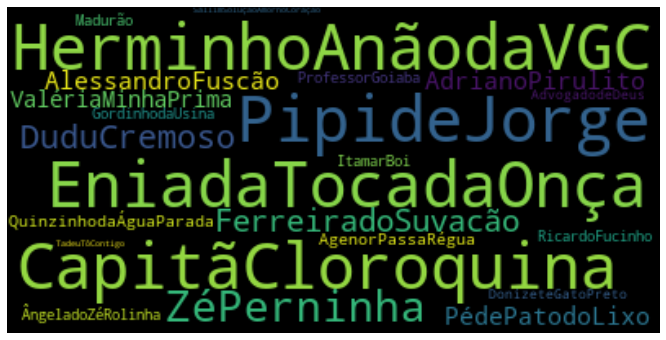

In [21]:
#Curiosidade! Código para obter a word cloud.
#!pip3 install WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Os espaços entre os nomes foram retirados para não serem tratados como pessoas diferentes!
candidatosWC=[i.replace(' ','') for i in list(candidatos.keys())]
wc = WordCloud(background_color="black", repeat=False).generate(" ".join(candidatosWC))

plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [22]:
def maisVotados(dic_candidatos):
    
    nomes=[i[0] for i in sorted(candidatos.items())]
    votos=[i[1][0] for i in sorted(candidatos.items())]

    sort_dic={}
    for v in range(len(votos)):
        valor=max(votos)
        ind=votos.index(valor)
        sort_dic[nomes[ind]]=valor
        votos.pop(ind)
        nomes.pop(ind)
    
    #Curiosidade: uma forma mais simples usando lambda. Não vamos estudar isso!
    #sort_dic=sorted(dic_candidatos.items(), key=lambda x: x[1], reverse=True)
    
    return sort_dic

In [23]:
maisVotados(candidatos)

{'Ferreira do Suvacão': 101,
 'Adriano Pirulito': 95,
 'Dudu Cremoso': 93,
 'Enia da Toca da Onça': 91,
 'Alessandro Fuscão': 85,
 'Quinzinho da Água Parada': 78,
 'Ângela do Zé Rolinha': 78,
 'Sallim Solução Amor no Coração': 75,
 'Madurão': 74,
 'Professor Goiaba': 72,
 'Donizete Gato Preto': 65,
 'Valéria Minha Prima': 65,
 'Gordinho da Usina': 61,
 'Tadeu Tô Contigo': 61,
 'Itamar Boi': 59,
 'Agenor Passa Régua': 57,
 'Advogado de Deus': 48,
 'Capitã Cloroquina': 45,
 'Pipi de Jorge': 45,
 'Ricardo Fucinho': 44,
 'Zé Perninha': 42,
 'Pé de Pato do Lixo': 39,
 'Herminho Anão da VGC': 27}